# Assignement 1 - Filippo Conforto

In [46]:
library(tidyverse)
library(repr)

## Exercise 1

### Dataframe creation

Starting from the information present in Wikipedia, one can produce a serie of vectors containing the lakes' names and their main properties

In [39]:
l_name = c("Loch Ness", "Loch Lomond", "Loch Morar", "Loch Tay","Loch Awe",
           "Loch Maree","Loch Ericht", "Loch Lochy","Loch Rannoch","Loch Shiel",
           "Loch Katrine","Loch Arkaig" ,"Loch Shin")
vol = c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,0.35)

area = c(56.0,71.0,27.0,26.4,39.0,28.6,18.6,16.0,19.0,19.5,12.4,16.0,22.5)
len = c(39.0,36.0,18.8,23.0,41.0,20.0,23.0,16.0,15.7,28.0,12.9,19.3,27.8)
max_d = c(230,190,310,150,94,114,156,162,134,128,151,109,49)
mean_d = c( 132.0,37.0,87.0,60.6,32.0,38.0,57.6,70.0,51.0,40.0,43.4,46.5,15.5)

Using these vector one can easily create a dataframe using `data.frame()` function 

In [40]:
lakes = data.frame(Loch = l_name, Volume = vol, Area = area, Length = len, Max_Depth = max_d, Mean_Depth = mean_d)

As an alternative we can produce a table in csv and read it

We can get the lake with highest attribute value after a simple sort

In [44]:
message("The lake with highest volume is: ",lakes[order(lakes$Volume, decreasing = TRUE),][1,]$Loch)
message("The lake with lowest volume is: ",lakes[order(lakes$Volume),][1,]$Loch)
message("The lake with highest area is: ",lakes[order(lakes$Area),][1,]$Loch)
message("The lake with lowest area is: ",lakes[order(lakes$Area, decreasing = TRUE),][1,]$Loch)

The lake with highest volume is: Loch Ness

The lake with lowest volume is: Loch Shin

The lake with highest area is: Loch Katrine

The lake with lowest area is: Loch Lomond



As before, one can produce an ordered dataframe using `order()`

In [93]:
lakes[order(lakes$Area, decreasing = TRUE),]

,Loch,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.60,71.0,36.0,190,37.0
1,Loch Ness,7.45,56.0,39.0,230,132.0
5,Loch Awe,1.20,39.0,41.0,94,32.0
6,Loch Maree,1.09,28.6,20.0,114,38.0
3,Loch Morar,2.30,27.0,18.8,310,87.0
4,Loch Tay,1.60,26.4,23.0,150,60.6
13,Loch Shin,0.35,22.5,27.8,49,15.5
10,Loch Shiel,0.79,19.5,28.0,128,40.0
9,Loch Rannoch,0.97,19.0,15.7,134,51.0


In [48]:
message("The two largest area lakes are ",lakes[order(lakes$Area, decreasing = TRUE),][1,]$Loch, " And ",lakes[order(lakes$Area, decreasing = TRUE),][2,]$Loch)

The two largest area lakes are Loch Lomond And Loch Ness



In [52]:
message("The sum of lakes' area is ",sum(lakes$Area)," km^2")

The sum of lakes' area is 372 km^2



## Exercise 2


Data import from original source

In [69]:
oildata = read.table("DATA/crude-oil-prices.csv", sep = ",", header = T)

Plotting Oil price through the years

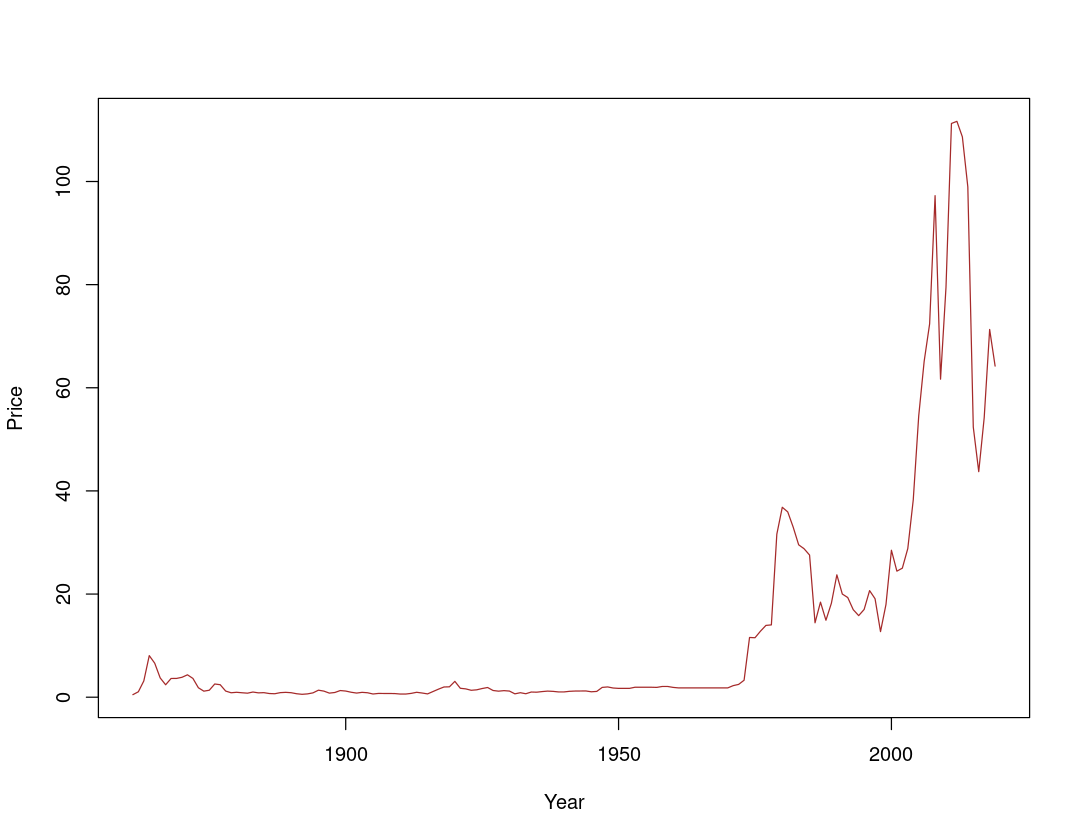

In [70]:
options(repr.plot.width=9, repr.plot.height=7)
plot(oildata$Year, oildata$Oil, t="l", xlab = "Year", ylab = "Price", col = "brown")

In [72]:
message("Highest oil price in history: ", format(oildata[order(oildata$OilPrice, decreasing = T),][1,]$OilPrice, digits = 5))
message("Highest oil price occurence: ",oildata[order(oildata$OilPrice, decreasing = T),][1,]$Year)

Highest oil price in history: 111.67

Highest oil price occurence: 2012



Derivative can be easily calculated and plotted

In [73]:
deriv = oildata[2:nrow(oildata),]$OilPrice - oildata[1:nrow(oildata)-1,]$OilPrice

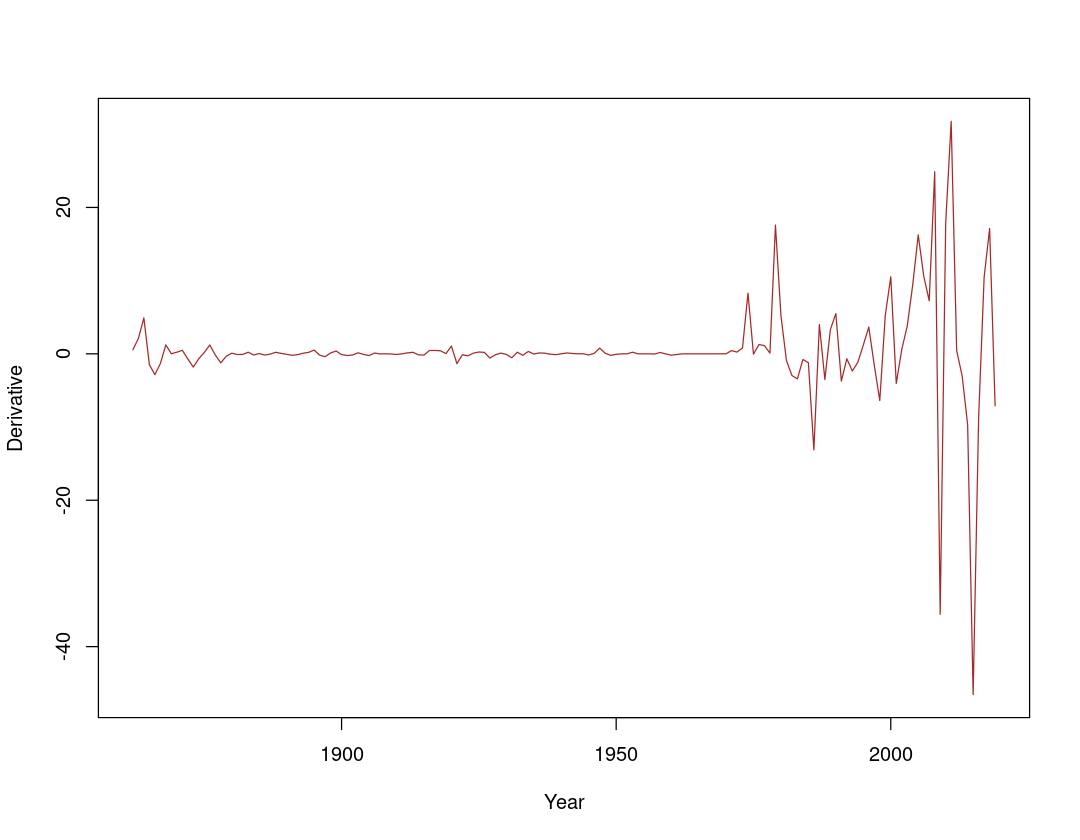

In [74]:
options(repr.plot.width=9, repr.plot.height=7)
plot(oildata$Year[-1], deriv, t="l", xlab = "Year", ylab = "Derivative", col = "brown")

## Exercise 3

In [2]:
coaldata = tibble(read_csv("DATA/coal-production-by-country.csv")) ## Download da internet



── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




From the starting dataframe we have to remove entities that does not represent a country, but continent or a group of states

In [3]:
not_cnt = c("Europe","EU-28", "CIS", "Eurasia", "Europe (other)", 'Asia Pacific','Asia and Oceania', 'Central and South America', 'OECD','OPEC','Other Africa','Other Asia & Pacific', 'Other CIS','Other S. & Cent. America', 'USSR', "World")
for (c in not_cnt){
    coaldata = coaldata[coaldata$Entity != c,]
}
un_cnt = unique(coaldata$Entity)

From this new dataframe one can all the different countries for which we have data and count them

In [4]:
message("The number of countries available in the file is ", length(un_cnt))

The number of countries available in the file is 184



To get the count of entries for each country we can use `table()` function and remove the country name, associated to each value.

In [5]:
counts = table(coaldata$Entity)
dimnames(counts) = NULL

Finally one can produce the barplot using the counts and the list of countries, since are both in alphabetic order

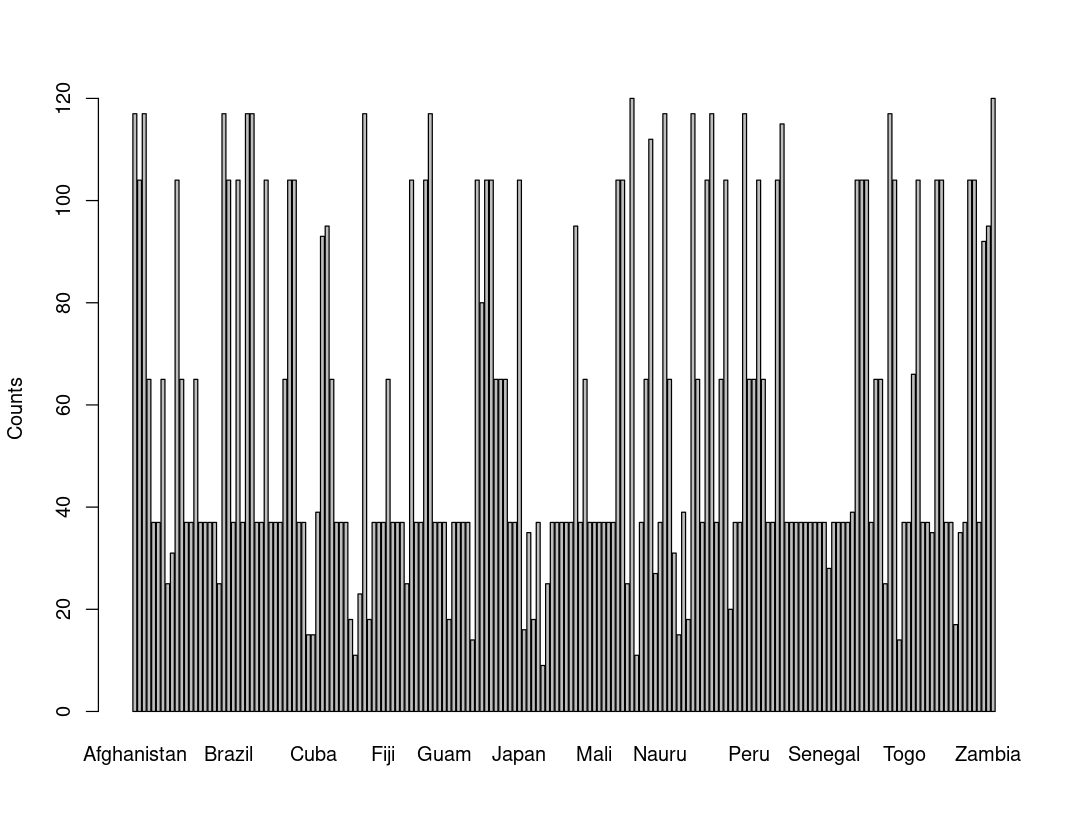

In [60]:
options(repr.plot.width=9, repr.plot.height=7)
barplot(counts, names.arg = un_cnt, ylab = "Counts")

For the next steps is useful to save a subset of the original dataframe, containing only data for years following the 1970

In [62]:
coaldata70 = coaldata[coaldata$Year > 1970,]

To get the sum of coal production `aggregate()` function is used

In [63]:
agg_coal = aggregate(coaldata70[4], by= list(coaldata70$Entity), FUN = sum)

In [64]:
for (i in 1:5){
    message("The ", i, "° country for coal production is ", agg_coal[order(agg_coal$C, decreasing = TRUE),][i,]$Group.1, " and has a total production of: ", agg_coal[order(agg_coal$C, decreasing = TRUE),][i,]$Coal, " TWh")
}


The 1° country for coal production is China and has a total production of: 459564.647 TWh

The 2° country for coal production is North America and has a total production of: 244443.419 TWh

The 3° country for coal production is United States and has a total production of: 226068.837 TWh

The 4° country for coal production is Russia and has a total production of: 98251.646 TWh

The 5° country for coal production is Australia and has a total production of: 83077.065 TWh



In [65]:
top_cnt = agg_coal[order(agg_coal$C, decreasing = TRUE),][1:5,]$Group.1

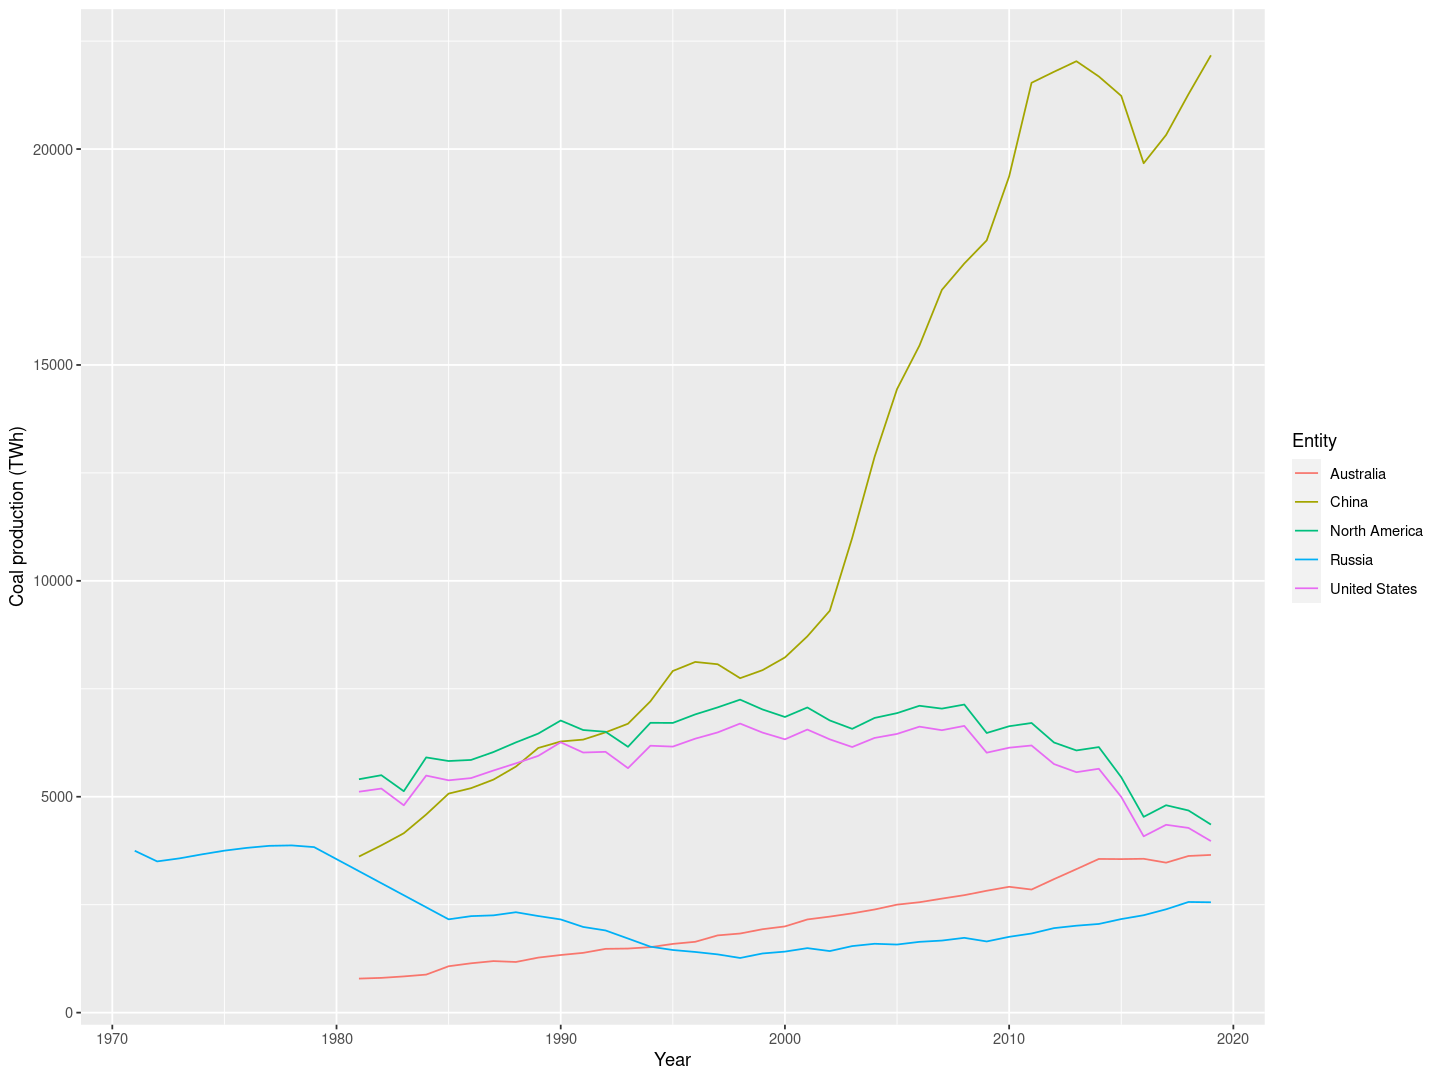

In [67]:
options(repr.plot.width=12, repr.plot.height=9)
ggplot ( subset(coaldata70,Entity %in% top_cnt)) + aes ( x = Year, y = `Coal production (TWh)`, group = Entity, colour = Entity) + geom_line()


## Exercise 4

In [8]:
data_covid = tibble(read_csv("DATA/vaccinations-by-manufacturer.csv"))


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)




### Italy

These cells are similar for all the countries discussed here and are used to save data regarding the selected country

In [9]:
data_ita = filter(data_covid, location == "Italy")

From this dataframe is possible, using ggplot, to get the desired graph

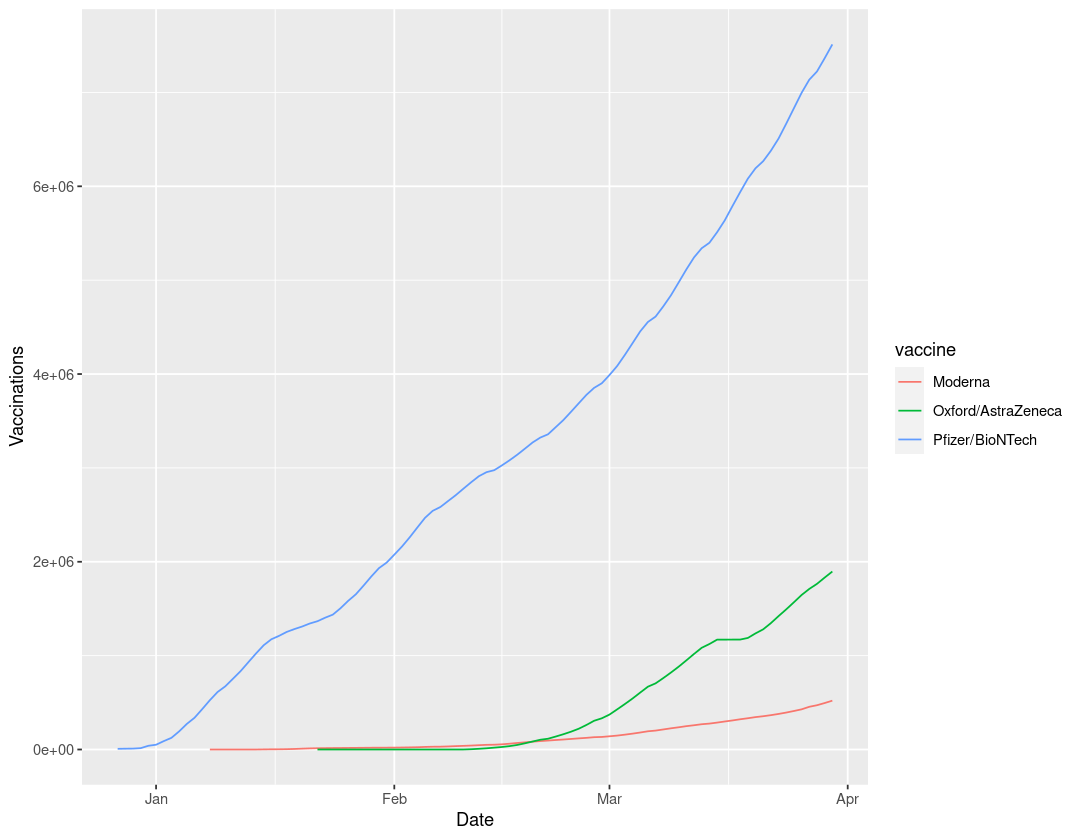

In [58]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_ita, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) + geom_line() + xlab("Date") + ylab("Vaccinations")

In order to get the total number of vaccinations an aggregate is required

In [12]:
data_agg = aggregate(data_ita$total_vaccinations, by= list(data_ita$date), FUN = sum)

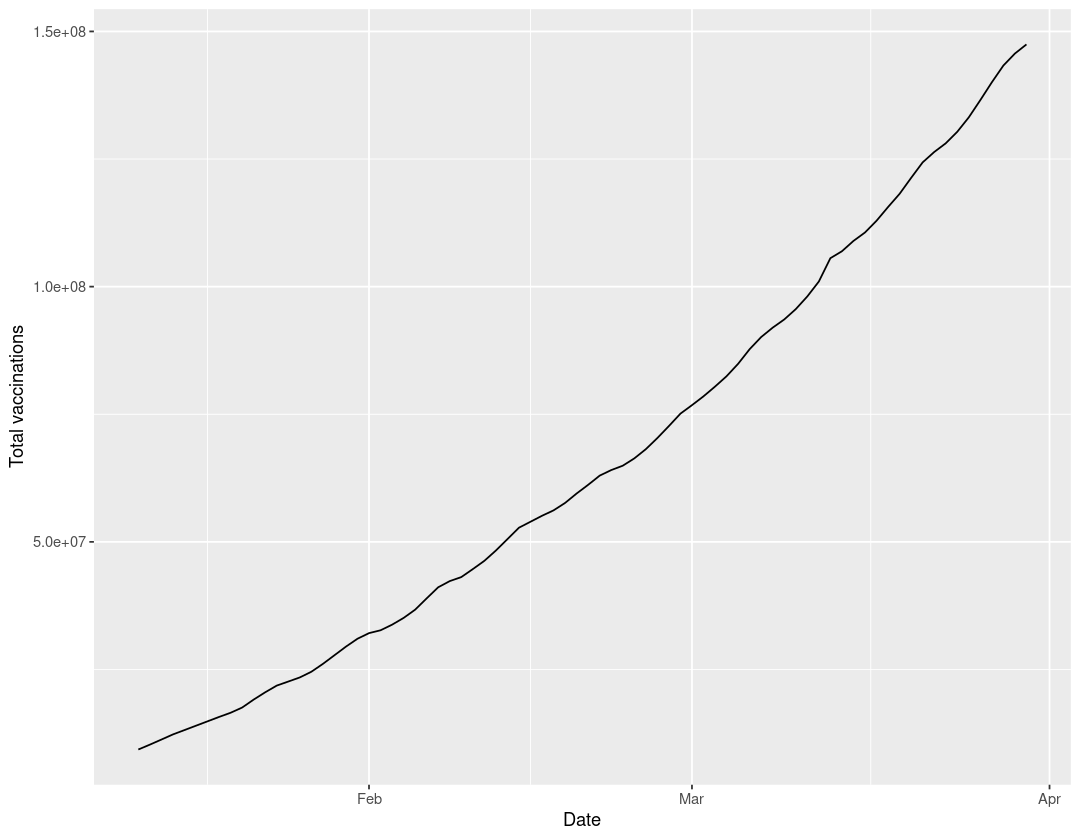

In [59]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_agg, aes ( x = Group.1, y = x), FUN = sum) + geom_line() +  xlab("Date") + ylab("Total vaccinations")


Using these techniques the analysis can be repeated over a number of different countries

### Germany

In [15]:
data_ger = filter(data_covid, location == "Germany")

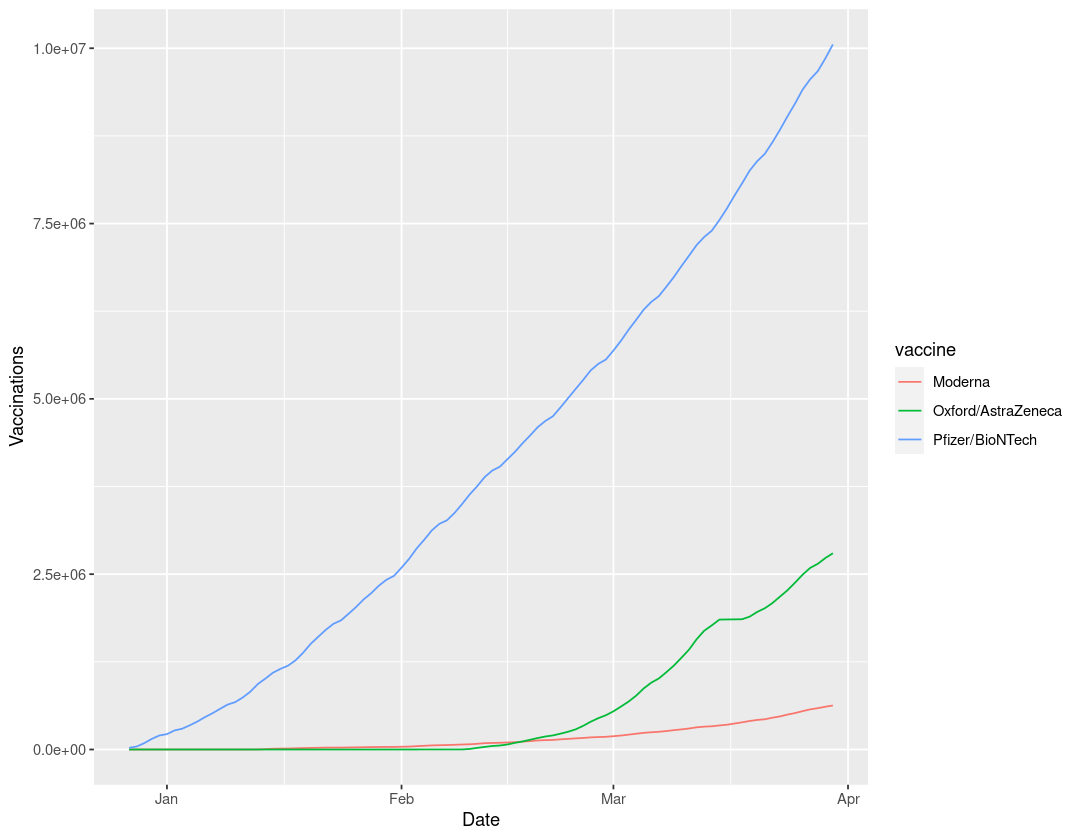

In [56]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_ger, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) + geom_line() + xlab("Date") + ylab("Vaccinations")

In [17]:
data_agg = aggregate(data_ger$total_vaccinations, by= list(data_ger$date), FUN = sum) 

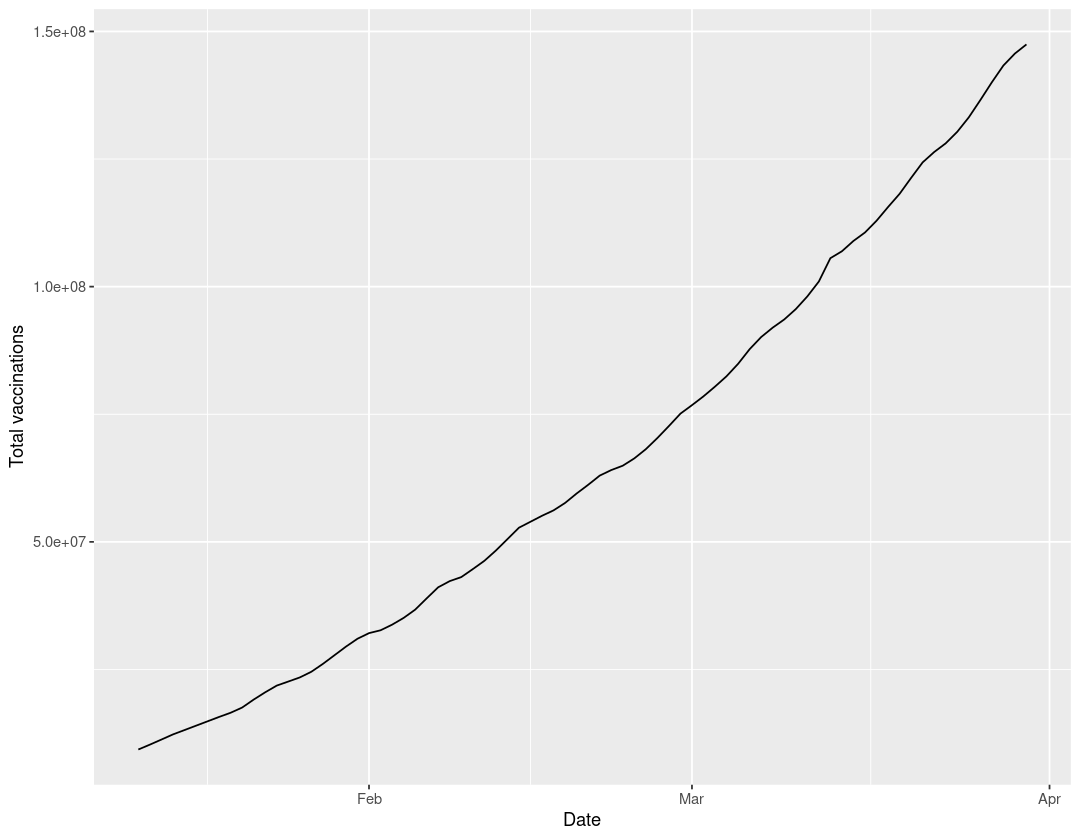

In [57]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_agg, aes ( x = Group.1, y = x), FUN = sum) + geom_line() + xlab("Date") + ylab("Total vaccinations")

### USA

In [19]:
data_usa = filter(data_covid, location == "United States")

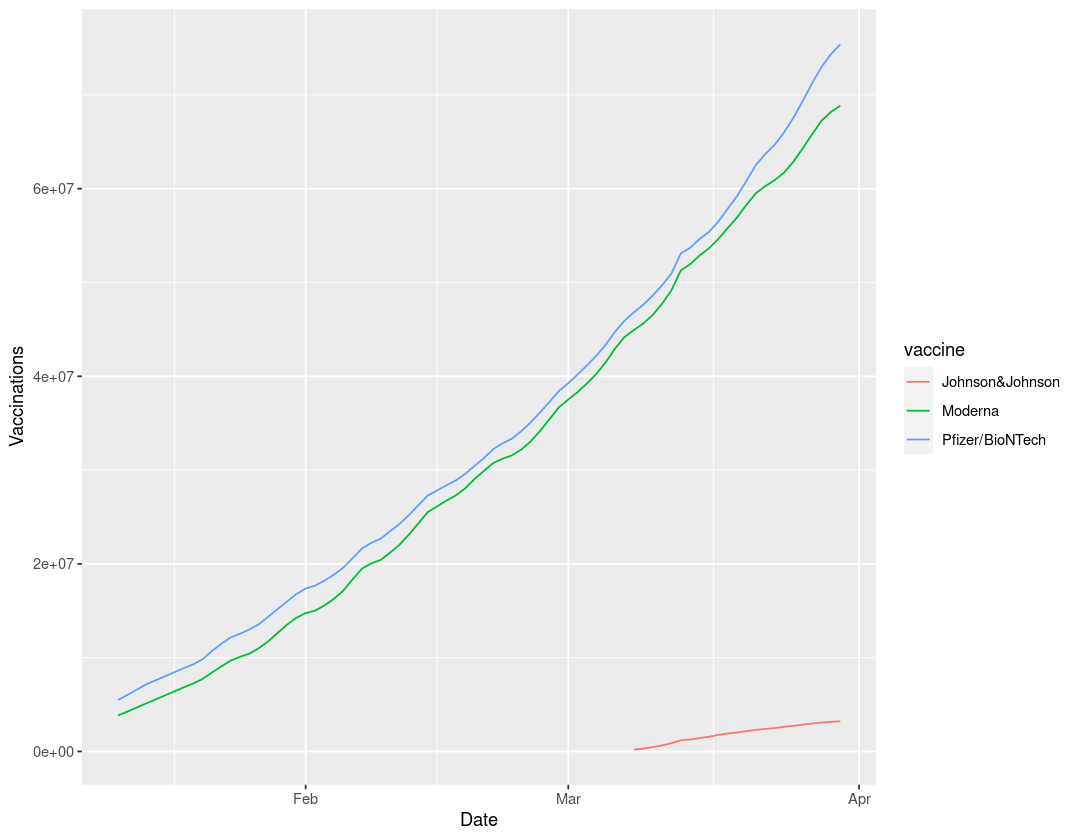

In [54]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_usa, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) + geom_line() + xlab("Date") + ylab("Vaccinations")


In [21]:
data_agg = aggregate(data_usa$total_vaccinations, by= list(data_usa$date), FUN = sum) 

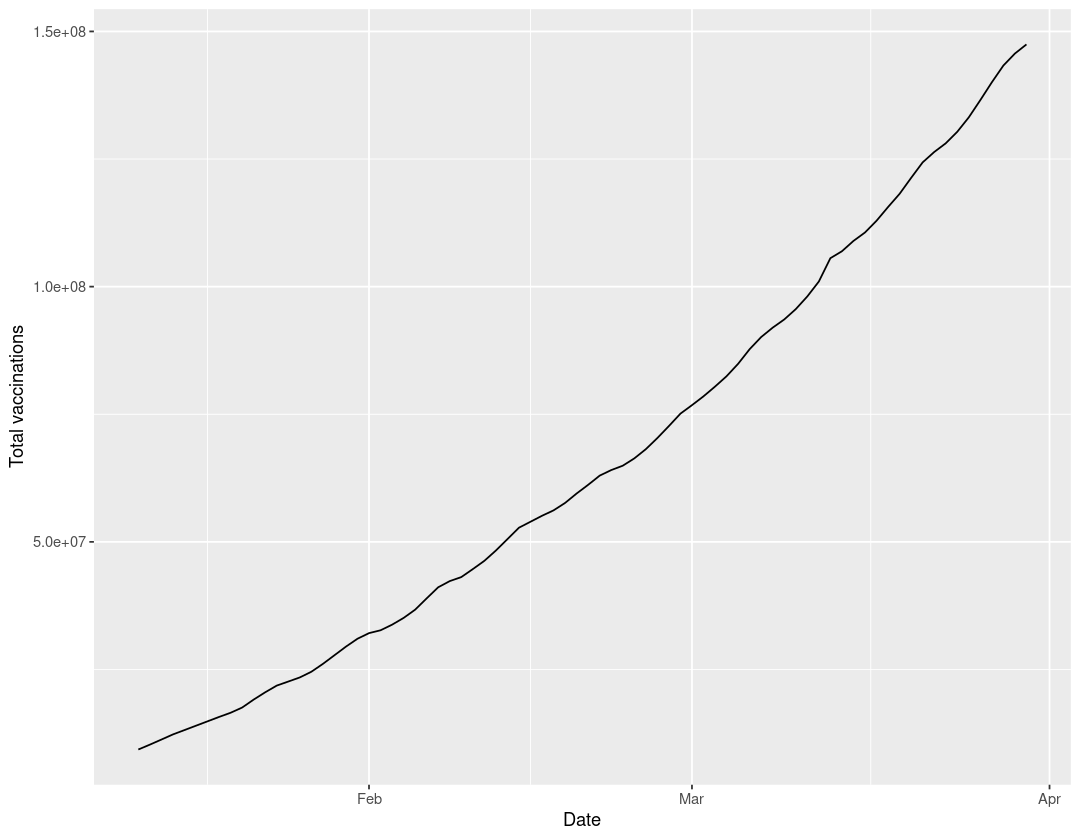

In [55]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_agg, aes ( x = Group.1, y = x), FUN = sum) + geom_line() + xlab("Date") + ylab("Total vaccinations")


### EU Countries 

In [23]:
covid_data2 = tibble(read_csv("DATA/vaccinations.csv"))


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)




By selecting the list of european countries, the final plot can be produced using ggplot.

In [24]:
eu_countries = c("Austria", "Belgium", "Bulgaria", "Croatia", "Republic of Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy",
                 "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden")

Warning message:
“Removed 42 row(s) containing missing values (geom_path).”


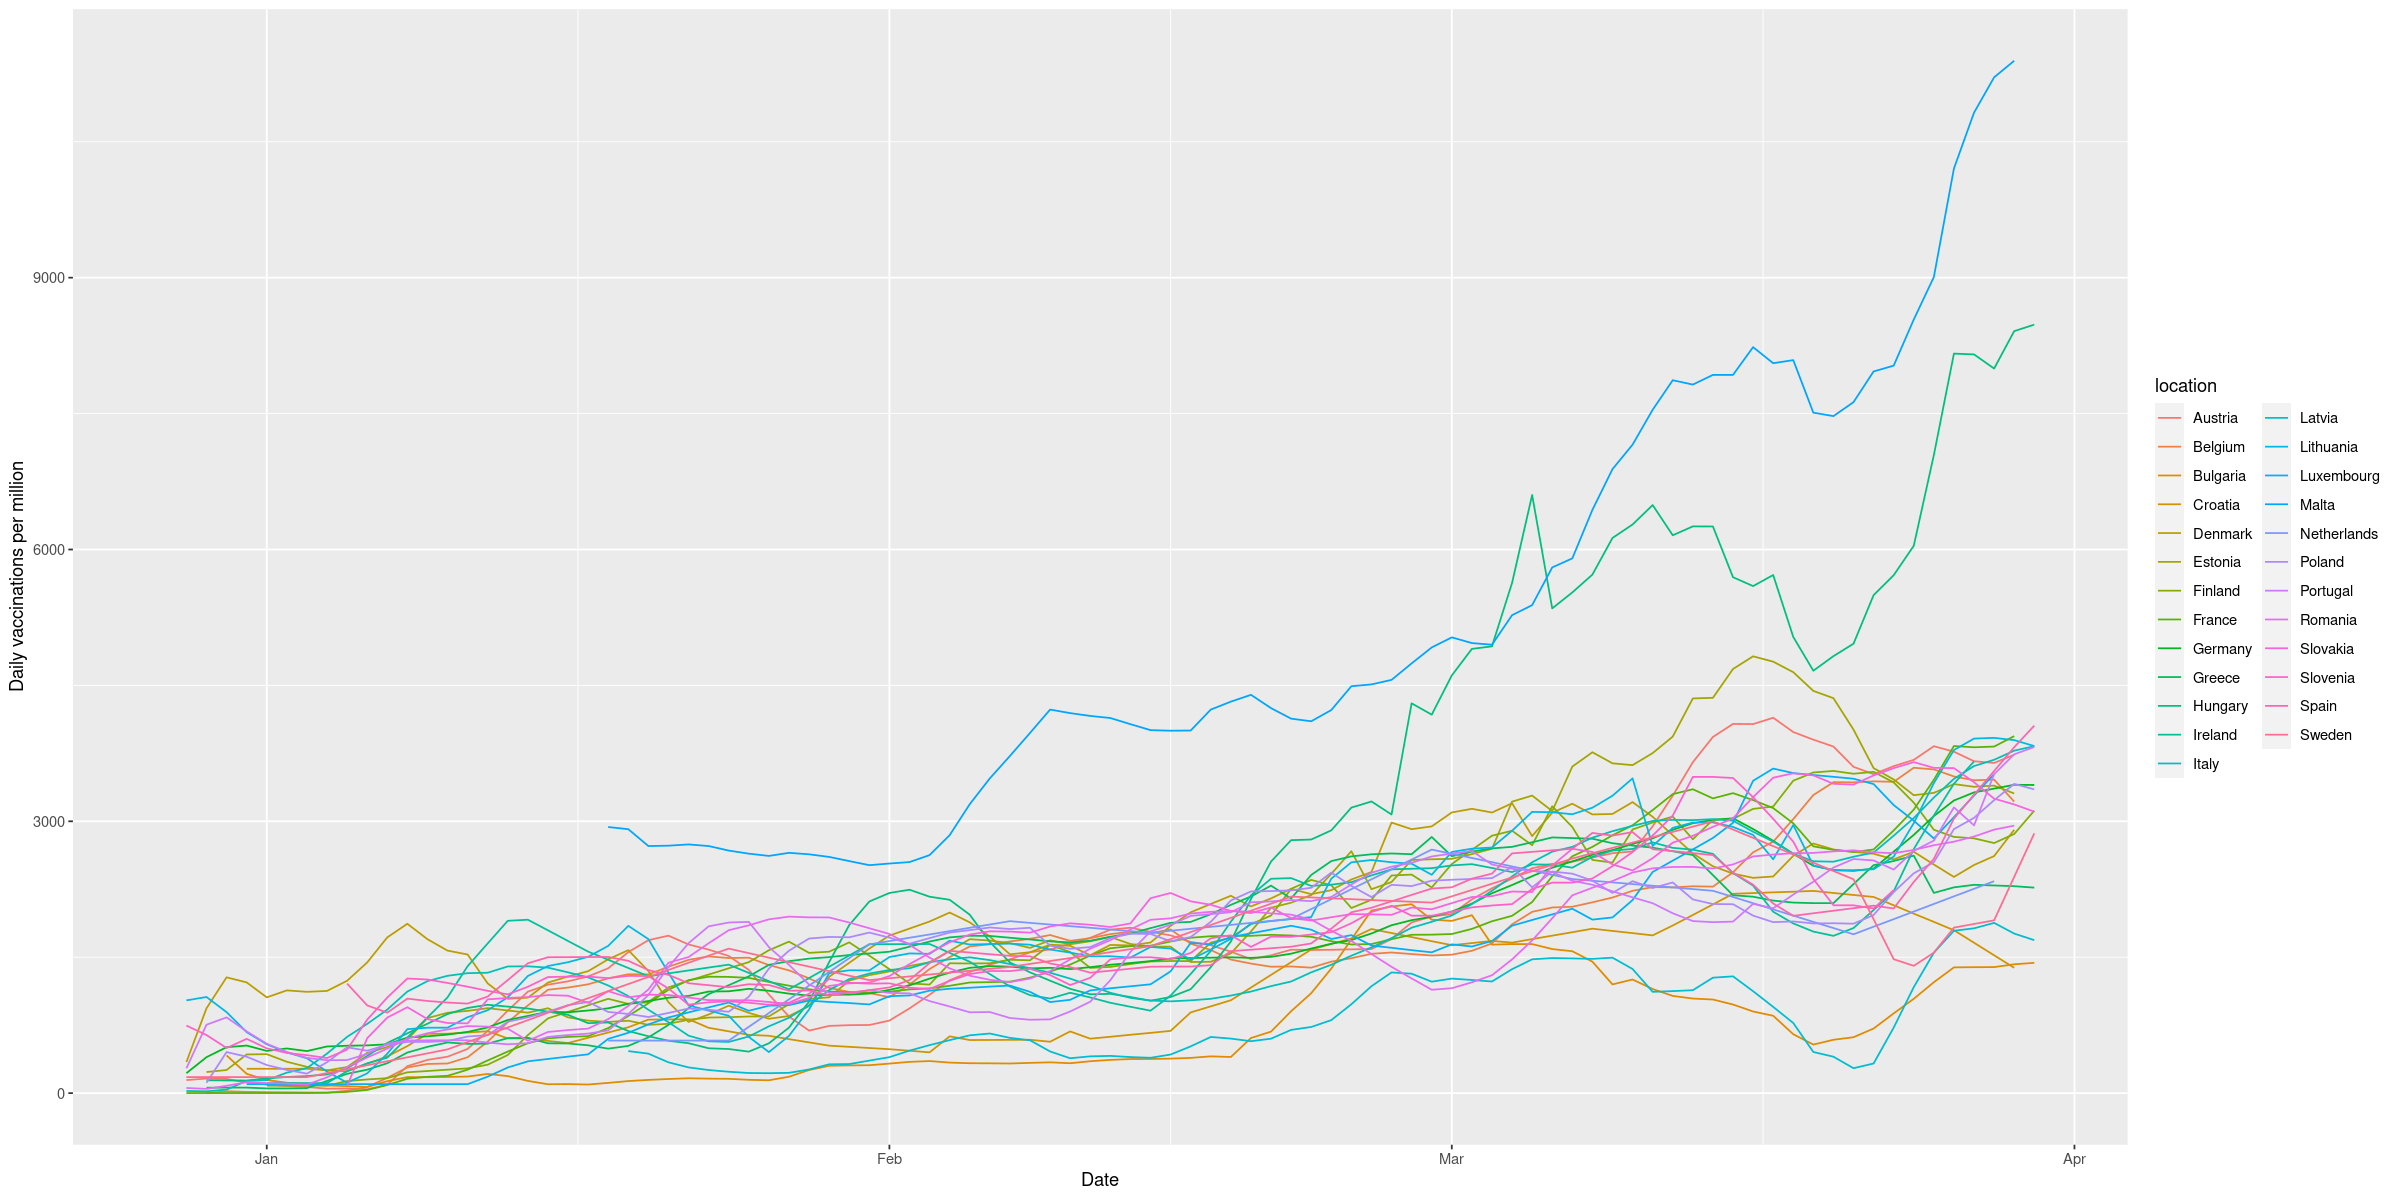

In [48]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot ( subset(covid_data2,location %in% eu_countries)) + aes ( x = date, y = daily_vaccinations_per_million, group = location, colour = location) + geom_line() + xlab("Date") + ylab("Daily vaccinations per million")

By plotting the number of people vaccinate and fully vaccinated in italy or othere countries we can see if there is a strategy on how to vaccinate people

Warning message:
“Removed 21 row(s) containing missing values (geom_path).”


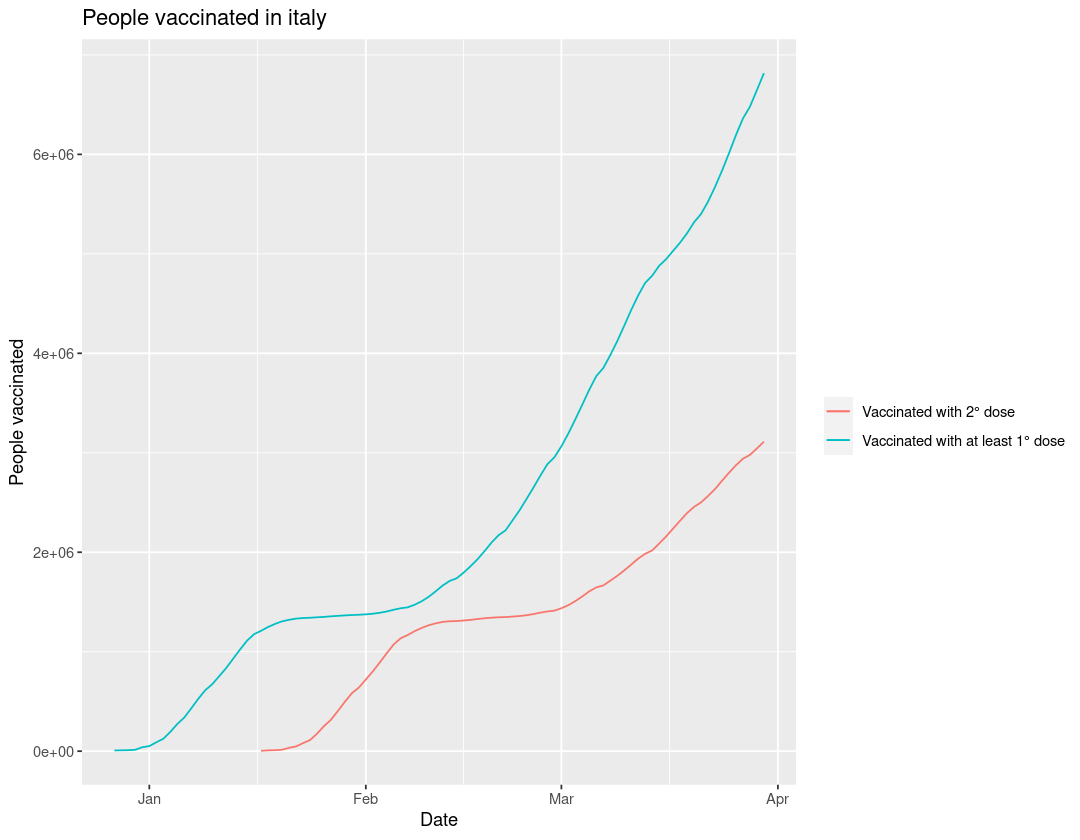

In [52]:
options(repr.plot.width=9, repr.plot.height=7)

ggplot() + 
    geom_line(data = filter(covid_data2, location == "Italy"), aes(x = date, y = people_vaccinated, color = "Vaccinated with at least 1° dose")) +
    geom_line(data = filter(covid_data2, location == "Italy"), aes(x = date, y = people_fully_vaccinated, color = "Vaccinated with 2° dose")) +
    labs( x="Date", y= "People vaccinated", color = "", title = "People vaccinated in italy")

Warning message:
“Removed 25 row(s) containing missing values (geom_path).”


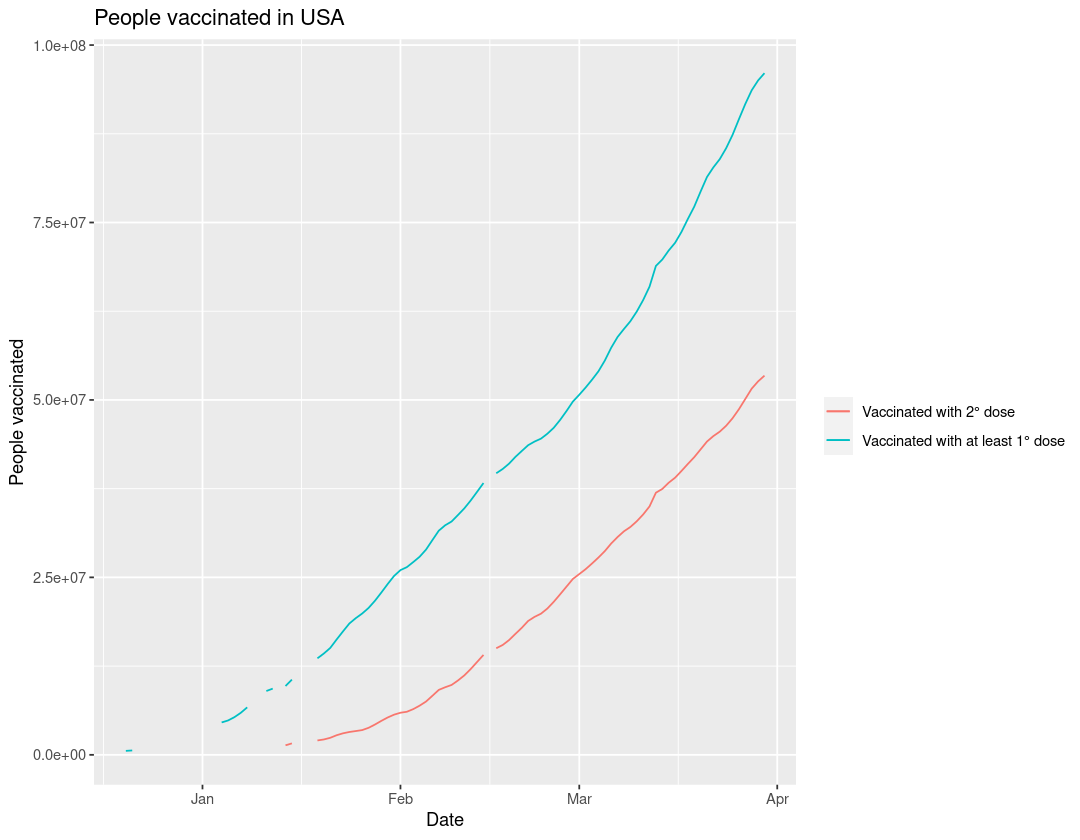

In [53]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot() + 
    geom_line(data = filter(covid_data2, location == "United States"), aes(x = date, y = people_vaccinated, color = "Vaccinated with at least 1° dose")) +
    geom_line(data = filter(covid_data2, location == "United States"), aes(x = date, y = people_fully_vaccinated, color = "Vaccinated with 2° dose")) +
    labs( x="Date", y= "People vaccinated", color = "", title = "People vaccinated in USA")

We can see how the difference between the two quantities is much larger in Italy, in comparison with the USA one.